# Exploratory Data Analysis on the `Algae` dataset

Mattéo Menager - 20105354

## Which datasets to consider?

In [1]:
import random

# Students should replace 12345678 with their student id (8-digit number, starting with 200)
myStudentId = 20105354

# Use myStudentId as the seed for the random number generator
random.seed(myStudentId)

dataSetToIgnore = random.choice(['Tips', 'Titanic', 'Algae'])
dataSetToIgnore

'Titanic'

Following the random dataset selection, I will work on the `Tips` and `Algae` datasets. In an effort to keep the notebook clean, I will only work on the `Algae` dataset in this notebook. The `Tips` dataset will be explored in a separate notebook.

# Notes on running this notebook. 

This notebook can be run using the `data-mining` anaconda environment created at the beginning of the semester. 

This environment is a regular anaconda environment with the following packages added: `dtale`, `voila`, `feature-tools`, `graphviz`, `pydot`, `ipywidgets`, `phik`, `pingouin`.

The Python version of this environment is `3.11.5`.

# Task 1: First pass - load data set and initial clean

## 1.1 Importing libraries

Before anaything, we will import the libraries we will need for this notebook : some core data science modules, statistical modules and some visualisations modules. 

In [2]:
import numpy as np
import pandas as pd

# statistical modules
import scipy.stats as stats 
import statsmodels.api as sm 
import pingouin as pg

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

# set the default style for plots
plt.style.use("seaborn-darkgrid")

# matplotlib magic to show plots inline
%matplotlib inline

/var/folders/dt/58d383mx6m5glpsgpmmsbj_80000gn/T/ipykernel_48282/2809092150.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


## 1.2 Importing the dataset and inspecting it

Next, we need to import our dataset into a pandas dataframe.

In [3]:
names = ('Season','Size','Speed','max_pH','min_O2','mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4', 'mean_PO4','mean_Chlor','a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7')
df = pd.read_table('data/04-Algae_Blooms/src/Analysis.txt', sep='\s+', names=names, na_values='XXXXXXX')
print(df.shape)
df.head()

(200, 18)


,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7
0,winter,small,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.0,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.3,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.6,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.4,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.5,9.2,2.9,7.5,0.0,7.5,4.1,1.0


Perfect, we have our dataset loaded into a pandas dataframe. All columns have a name and missing values are indicated by `NaN`. We can see above the first few rows, and the column names.

Now we'll just look at some basic information about the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      200 non-null    object 
 1   Size        200 non-null    object 
 2   Speed       200 non-null    object 
 3   max_pH      199 non-null    float64
 4   min_O2      198 non-null    float64
 5   mean_Cl     190 non-null    float64
 6   mean_NO3    198 non-null    float64
 7   mean_NH4    198 non-null    float64
 8   mean_oPO4   198 non-null    float64
 9   mean_PO4    198 non-null    float64
 10  mean_Chlor  188 non-null    float64
 11  a1          200 non-null    float64
 12  a2          200 non-null    float64
 13  a3          200 non-null    float64
 14  a4          200 non-null    float64
 15  a5          200 non-null    float64
 16  a6          200 non-null    float64
 17  a7          200 non-null    float64
dtypes: float64(15), object(3)
memory usage: 28.3+ KB


In [5]:
df.tail()

,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7
195,autumn,large,medium,8.4,8.4,17.375,3.833,83.750,53.625,79.750,2.338,12.7,21.7,5.6,0.0,1.0,0.0,0.0
196,spring,large,medium,8.3,10.6,14.320,3.200,125.333,35.333,75.904,4.667,18.0,7.0,1.7,0.0,4.8,10.3,1.0
197,autumn,large,medium,8.2,7.0,139.989,2.978,60.110,78.333,140.220,31.738,0.0,15.9,2.4,1.0,0.0,0.0,0.0
198,winter,large,medium,8.0,7.6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.5,3.7,1.0,0.0,0.0,4.9
199,summer,large,medium,8.5,6.7,82.852,2.800,27.069,64.000,140.517,18.300,2.4,10.5,9.0,7.8,0.0,0.0,5.8


We can see that the dataset has 200 rows and 18 columns. 

The columns are all of type `float64` except for `Season`, `Size` and `Speed` which are of type `object`. We need to convert the latters to `category`.

There are no extraneous values at the end of the file.

## 1.3 Converting categorical columns to `category` type

The three categorical variables have levels with a natural order, we will them to category and specify the order.

In [6]:
df.Season = pd.Categorical(df.Season, categories=['spring', 'summer', 'autumn', 'winter'], ordered=True)
df.Season.unique()

['winter', 'spring', 'autumn', 'summer']
Categories (4, object): ['spring' < 'summer' < 'autumn' < 'winter']

In [7]:
df.Size = pd.Categorical(df.Size, categories=['small', 'medium', 'large'], ordered=True)
print(df.Size.unique())

['small', 'medium', 'large']
Categories (3, object): ['small' < 'medium' < 'large']


In [8]:
df.Speed = pd.Categorical(df.Speed, categories=['low', 'medium', 'high'], ordered=True)
print(df.Speed.unique())

['medium', 'high', 'low']
Categories (3, object): ['low' < 'medium' < 'high']


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Season      200 non-null    category
 1   Size        200 non-null    category
 2   Speed       200 non-null    category
 3   max_pH      199 non-null    float64 
 4   min_O2      198 non-null    float64 
 5   mean_Cl     190 non-null    float64 
 6   mean_NO3    198 non-null    float64 
 7   mean_NH4    198 non-null    float64 
 8   mean_oPO4   198 non-null    float64 
 9   mean_PO4    198 non-null    float64 
 10  mean_Chlor  188 non-null    float64 
 11  a1          200 non-null    float64 
 12  a2          200 non-null    float64 
 13  a3          200 non-null    float64 
 14  a4          200 non-null    float64 
 15  a5          200 non-null    float64 
 16  a6          200 non-null    float64 
 17  a7          200 non-null    float64 
dtypes: category(3), float64(15)
memory usage: 24.6 KB


Now we can see that all our types are correct. 

## 1.4 Adressing the missing values

In [10]:
df.isna().sum()

Season         0
Size           0
Speed          0
max_pH         1
min_O2         2
mean_Cl       10
mean_NO3       2
mean_NH4       2
mean_oPO4      2
mean_PO4       2
mean_Chlor    12
a1             0
a2             0
a3             0
a4             0
a5             0
a6             0
a7             0
dtype: int64

We can see that two columns `mean_Cl` and `mean_Chlor` account for 22 missing values (out of 33), but we cannot just drop them as we would lose a lot of information. We will adress this later.

In [11]:
df.isna().sum(axis=1).value_counts()

0    184
1      7
2      7
6      2
dtype: int64

However, 2 rows each contains 6 missing values. These rows are very incomplete and account for a big portion of the missing values but represent a very small portion of the dataset. We can safely drop them.

However, it would not be wise to remove the other rows containing null values as they are almost complete and represent a significant share of the data. In fact, there 7 rows containing 1 missing value and 7 rows (7% of the dataset). 

In [12]:
df.loc[df.isna().sum(axis=1)==6]

,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7
61,summer,small,medium,6.4,NaN,NaN,NaN,NaN,NaN,14.0,NaN,19.4,0.0,0.0,2.0,0.0,3.9,1.7
198,winter,large,medium,8.0,7.6,NaN,NaN,NaN,NaN,NaN,NaN,0.0,12.5,3.7,1.0,0.0,0.0,4.9


These two rows are the ones with 6 missing values. We can in fact see that they do not contain a lot of information as all the a1 to a7 columns are targets.

In [13]:
df = df.loc[df.isna().sum(axis=1)<6].copy()
df.shape

(198, 18)

In [14]:
df.isna().sum()

Season         0
Size           0
Speed          0
max_pH         1
min_O2         1
mean_Cl        8
mean_NO3       0
mean_NH4       0
mean_oPO4      0
mean_PO4       1
mean_Chlor    10
a1             0
a2             0
a3             0
a4             0
a5             0
a6             0
a7             0
dtype: int64

We now have only 5 columns with missing values instead of 8 previously. Most of these are concentrated in the `mean_Cl` and `mean_Chlor` columns, and all of them are in numerical columns. We will adress the remaining missing values by looking at the data itself.

In [15]:
numericals = df[['max_pH', 'min_O2', 'mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4', 'mean_PO4', 'mean_Chlor']]
categoricals = df[['Season', 'Size', 'Speed']]
targets = df[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']]

In [16]:
# make a copy of numericals so when we can still see the chart with outliers after we remove them
numericals_copy = numericals.copy()

ddFeature = widgets.Dropdown(options=numericals.columns, value=numericals.columns[0], description="Feature")

def showDistribution(feature):
    fig, axes = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(20, 4))
    # plot boxplot
    sns.boxplot(x=feature, data=numericals_copy, ax=axes[0])
    # plot histogram
    sns.histplot(x=feature, data=numericals_copy, kde=True, ax=axes[1])
    axes[1].axvline(numericals_copy[feature].median(), color='r', linestyle='--', label='median')
    axes[1].axvline(numericals_copy[feature].mean(), color='g', linestyle='-', label='mean')
    axes[1].legend()
    # plot qqplot
    pg.qqplot(numericals_copy[feature], dist='norm', ax=axes[2])

out = widgets.interactive_output(showDistribution, {"feature":ddFeature})
display(ddFeature, out)

Dropdown(description='Feature', options=('max_pH', 'min_O2', 'mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4', '…

Output()

In [17]:
numericals.corr()

,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor
max_pH,1.000000,-0.168894,0.136108,-0.130981,-0.093536,0.158999,0.180318,0.445962
min_O2,-0.168894,1.000000,-0.278333,0.099444,-0.087478,-0.416163,-0.487486,-0.153265
mean_Cl,0.136108,-0.278333,1.000000,0.225041,0.071913,0.391054,0.457449,0.149856
mean_NO3,-0.130981,0.099444,0.225041,1.000000,0.721444,0.144588,0.168601,0.139679
mean_NH4,-0.093536,-0.087478,0.071913,0.721444,1.000000,0.227237,0.208180,0.088947
mean_oPO4,0.158999,-0.416163,0.391054,0.144588,0.227237,1.000000,0.914365,0.115621
mean_PO4,0.180318,-0.487486,0.457449,0.168601,0.208180,0.914365,1.000000,0.253621
mean_Chlor,0.445962,-0.153265,0.149856,0.139679,0.088947,0.115621,0.253621,1.000000


To adress the (only) `max_pH` missing value, we can see that `max_pH` is not greatly correlated with any other feature. Hence, the best way to fill the missing value is to look at the distribution. We can see that the feature is relatively normally distributed, so we can fill the missing value with the mean.

In [18]:
df.max_pH.fillna(df.max_pH.mean(), inplace=True)

Same for the `min_O2`, we can't find any significant correlation to infer its value from another feature. However, when looking at its distribution, we see that `min_O2` is left-skewed. Hence, we will fill the missing value with the median.

In [19]:
df.min_O2.fillna(df.min_O2.median(), inplace=True)

We can see that `mean_PO4` is highly correlated with `mean_oPO4`, hence we can use linear regression to fill the missing value. 

<AxesSubplot: xlabel='mean_oPO4', ylabel='mean_PO4'>

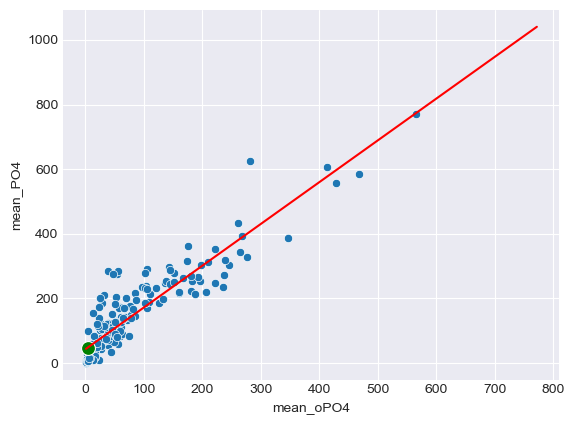

In [20]:
# scatter plot x = mean_PO4, y = mean_oPO4 stopping at x = 100 (to see better, the regression data does not stop at x = 100)
sns.scatterplot(x='mean_oPO4', y='mean_PO4', data=numericals)
# find row where mean_PO4 is NaN
numericals.loc[numericals['mean_PO4'].isna()]
# regression data without that row
regression_data = numericals[['mean_PO4', 'mean_oPO4']].dropna(subset=['mean_PO4'])
# get coefficients of linear regression line
results = stats.linregress(x=regression_data['mean_oPO4'], y=regression_data['mean_PO4'])
#plot regression line on scatter plot
x_reg = np.linspace(regression_data['mean_PO4'].min(), regression_data['mean_PO4'].max(), 1000)
y_reg = results.slope * x_reg + results.intercept
sns.lineplot(x=x_reg, y=y_reg, color='r')
# calculate mean_PO4 for mean_oPO4 when mean_oPO4 is NaN
mean_oPO4_value = numericals.loc[numericals['mean_PO4'].isna(), 'mean_oPO4']
mean_PO4_value = results.slope * mean_oPO4_value + results.intercept
# plot point for mean_PO4 when mean_oPO4 is NaN
sns.scatterplot(x=mean_oPO4_value, y=mean_PO4_value, color='g', s=100)

In [21]:
#fill NaN value in mean_PO4 with calculated value
df.mean_PO4.fillna(mean_PO4_value.values[0], inplace=True)

The only missing values we have left are concentrated in `mean_Cl` and `mean_Chlor`. We cannot use regression for these as they are not highly correlated with any other feature. We will fill them with the median as they are both heavely skeved to the right.

In [22]:
df.mean_Cl.fillna(df.mean_Cl.median(), inplace=True)
df.mean_Chlor.fillna(df.mean_Chlor.median(), inplace=True)

In [23]:
# reassign numericals (numericals still contains NaN values)
numericals = df[['max_pH', 'min_O2', 'mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4', 'mean_PO4', 'mean_Chlor']]

In [24]:
numericals.isna().sum()

max_pH        0
min_O2        0
mean_Cl       0
mean_NO3      0
mean_NH4      0
mean_oPO4     0
mean_PO4      0
mean_Chlor    0
dtype: int64

Perfect, we have no more missing values. The next step will be to address potentially erroneous values (extreme outliers).

## 1.5 Adressing extreme values

In this step we want to address extreme values. We want to discover if their value is due to a typo or just a larger than usual (but real) value. We will use the `describe()` method to get reference points for each feature and we will identify the extreme values on the boxplots above.

In [25]:
df.describe()

,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,8.019975,9.128889,43.195621,3.282389,501.295828,73.590596,138.054168,13.542096,16.996465,7.470707,4.334343,1.997475,5.115657,6.004545,2.487374
std,0.588669,2.389275,45.921064,3.776474,1962.545461,91.136436,128.850294,20.055870,21.421713,11.065461,6.976788,4.439205,7.511846,11.711053,5.181536
min,5.600000,1.500000,0.222000,0.050000,5.000000,1.000000,1.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.705000,7.825000,11.022000,1.296000,38.333250,15.700000,43.659000,2.112500,1.525000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.060000,9.800000,32.730000,2.675000,103.166500,40.150000,103.285500,5.475000,6.950000,3.000000,1.550000,0.000000,2.000000,0.000000,1.000000
75%,8.400000,10.800000,57.491750,4.446250,226.950007,99.333250,213.750000,17.200000,24.800000,11.275000,4.975000,2.400000,7.500000,6.975000,2.400000
max,9.700000,13.400000,391.500000,45.650000,24064.000000,564.599980,771.599980,110.456000,89.800000,72.600000,42.800000,44.600000,44.400000,77.600000,31.600000


`mean_NO3` seems to have an anormal outlier that may be due to a typo (45 instead of 4.5). As this feature is quite correlated with `mean_NH4`, we will check the value of the latter for this row.

In [26]:
numericals.loc[numericals['mean_NO3']>40]

,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor
152,7.3,11.8,44.205,45.65,24064.0,44.0,34.0,53.1


`mean_NH4` for this row is also a big outlier (see boxplot), so it may not be a typo but a real outlier (other features values are standard for this row).

Since it is likely that it is a real value, we won't change it as it would be a lie. However we will remove this row as it may be bad for prediction.

> I did not include the code but it turns out `a6` is also a big outlier for this row, so it must be some kind of special river. As it is can make our predictive model worse, we will remove this row.

In [27]:
# drop row where mean_NO3 > 40
df.drop(index=df.loc[df['mean_NO3']>40].index, inplace=True)

`mean_Cl` also seems to have a big outlier. This feature is not really correlated to any other feature (nor target) and all values for other features are quite standard. We only have relatively high values for PO4s but not big outliers though. We can consider that it is a typo and divide its value by 10.

In [28]:
df.loc[numericals['mean_Cl']>300]

,Season,Size,Speed,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor,a1,a2,a3,a4,a5,a6,a7
133,spring,medium,medium,7.9,8.3,391.5,6.045,380.0,173.0,317.0,5.5,2.4,1.7,4.2,8.3,1.7,0.0,2.4


In [29]:
# divide mean_Cl by 10 for row where mean_Cl > 300
df.loc[df['mean_Cl']>300, 'mean_Cl'] = df.loc[df['mean_Cl']>300, 'mean_Cl'] / 10

We also have one further outlier for PO4s but not as distant compared to the previous ones and these features are already spread out so it is representative and it is the same for both that are correlated so likely not a typo but a real data point. We will leave this row as it is.

In [30]:
numericals.loc[numericals['mean_PO4']>700]

,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor
19,7.79,3.2,64.0,2.822,8777.59961,564.59998,771.59998,4.5


In [31]:
# reassign after deleting one row and dividing one value by 10
df.reset_index(inplace=True)
numericals = df[['max_pH', 'min_O2', 'mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4', 'mean_PO4', 'mean_Chlor']]
categoricals = df[['Season', 'Size', 'Speed']]
targets = df[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']]
df.shape

(197, 19)

Our data is now ready for analysis. We have no missing values and we removed one potential typo and one extreme outlier.

# Task 2: Second pass - individual features and target

In this section, we will look at each feature individually and in relation with the target variables. We will also look at the target variables individually to get a better sense of the dataset.

## 2.1 Numerical features

Let's first look at the numerical features. We have 8 of them.

We can start by computing some basic statistics on these features and by looking at there distribution.

In [32]:
numericals.describe()

,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,8.023629,9.115330,41.401919,3.067325,381.688193,73.740802,138.582362,13.341294
std,0.587913,2.387713,38.696106,2.264905,1012.026850,91.344057,128.963494,19.906426
min,5.600000,1.500000,0.222000,0.050000,5.000000,1.000000,1.000000,0.200000
25%,7.720000,7.800000,11.000000,1.288000,38.111000,15.600000,44.136000,2.100000
50%,8.060000,9.800000,32.730000,2.670000,103.000000,39.000000,104.000000,5.475000
75%,8.400000,10.800000,56.717000,4.408000,225.000000,100.000000,214.000000,17.200000
max,9.700000,13.400000,208.364000,10.416000,8777.599610,564.599980,771.599980,110.456000


max_pH           AxesSubplot(0.125,0.53;0.168478x0.35)
min_O2        AxesSubplot(0.327174,0.53;0.168478x0.35)
mean_Cl       AxesSubplot(0.529348,0.53;0.168478x0.35)
mean_NO3      AxesSubplot(0.731522,0.53;0.168478x0.35)
mean_NH4         AxesSubplot(0.125,0.11;0.168478x0.35)
mean_oPO4     AxesSubplot(0.327174,0.11;0.168478x0.35)
mean_PO4      AxesSubplot(0.529348,0.11;0.168478x0.35)
mean_Chlor    AxesSubplot(0.731522,0.11;0.168478x0.35)
dtype: object

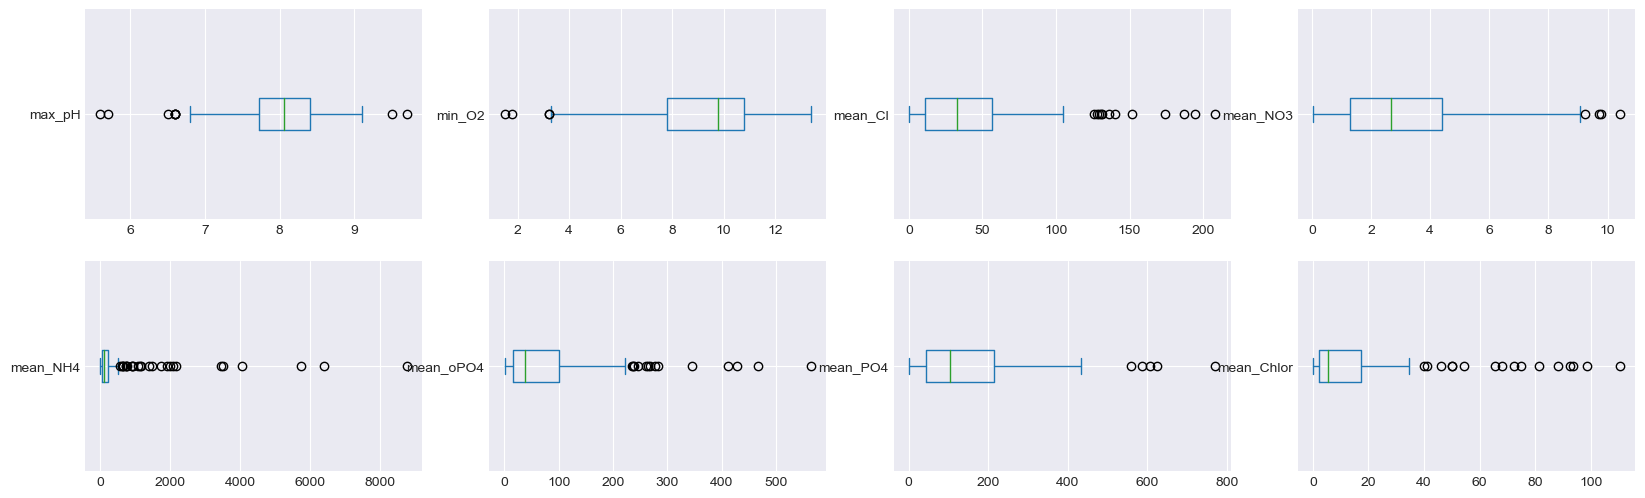

In [33]:
numericals.plot(kind='box', figsize=(20,6), subplots=True, layout=(2,4), sharex=False, sharey=False, vert=False)

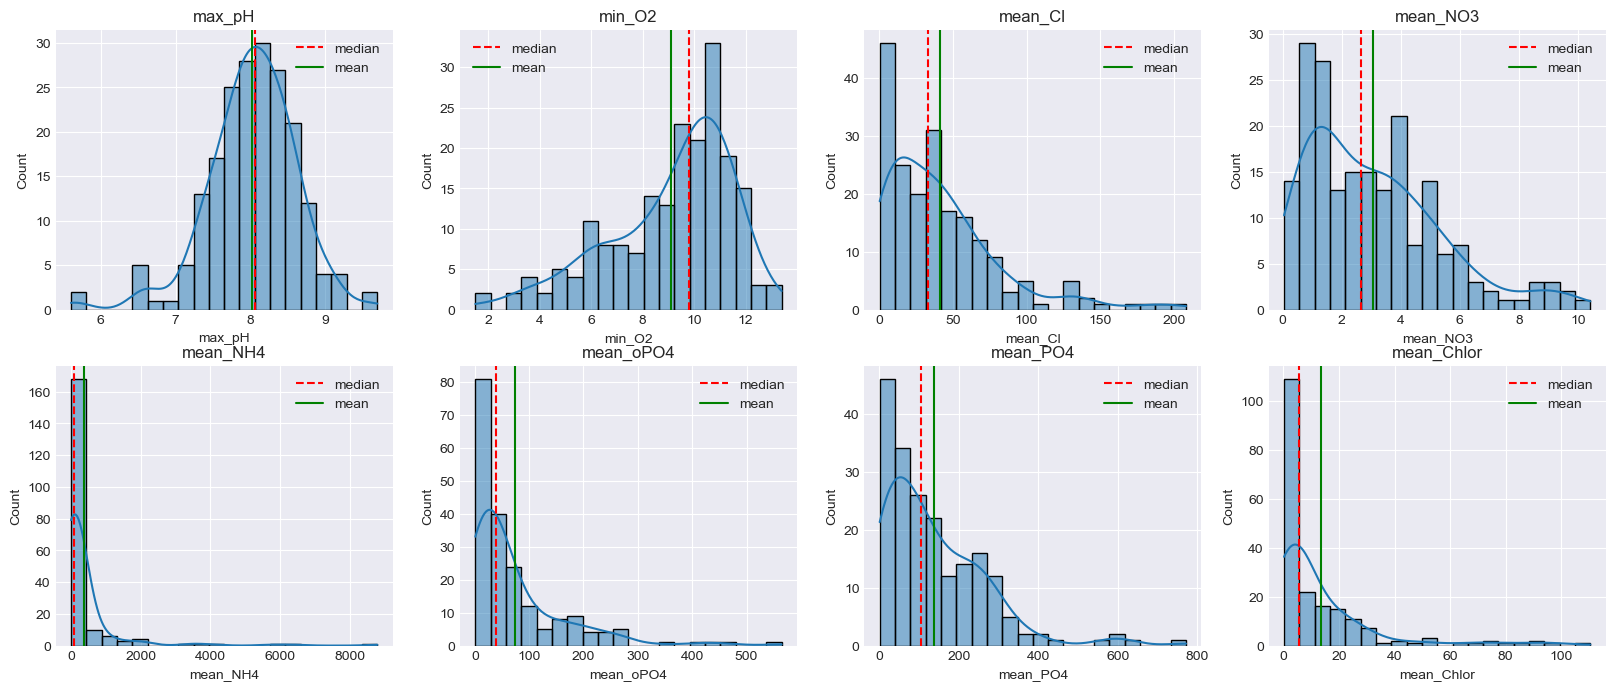

In [34]:
fig, axes = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(20, 8))
for column, ax in zip(numericals.columns, axes.flatten()):
    sns.histplot(numericals[column], kde=True, ax=ax, bins=20)
    # plot median and mean as vertical lines
    ax.axvline(numericals[column].median(), color='r', linestyle='--', label='median')
    ax.axvline(numericals[column].mean(), color='g', linestyle='-', label='mean')
    ax.set_title(column)
    ax.legend()

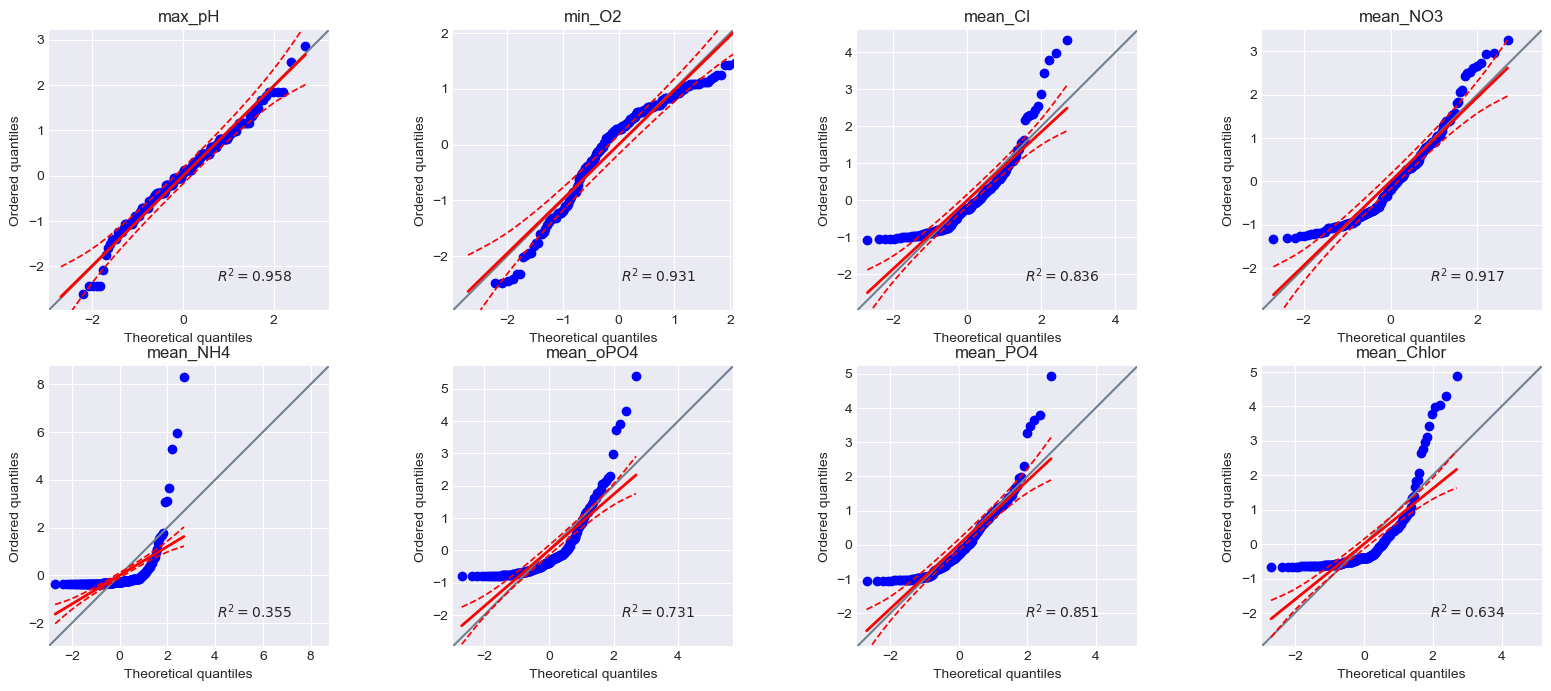

In [35]:
fig, axes = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(20, 8))
for column, ax in zip(numericals.columns, axes.flatten()):
    pg.qqplot(numericals[column], dist='norm', ax=ax)
    ax.set_title(column)

In [36]:
ddFeature2 = widgets.Dropdown(options=numericals.columns, value=numericals.columns[0], description="Feature")
def showDistribution2(feature):
    fig, axes = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(20, 4))
    # plot boxplot
    sns.boxplot(x=feature, data=numericals, ax=axes[0])
    # plot histogram
    sns.histplot(x=feature, data=numericals, kde=True, ax=axes[1])
    axes[1].axvline(numericals[feature].median(), color='r', linestyle='--', label='median')
    axes[1].axvline(numericals[feature].mean(), color='g', linestyle='-', label='mean')
    axes[1].legend()
    # plot qqplot
    pg.qqplot(numericals[feature], dist='norm', ax=axes[2])

out = widgets.interactive_output(showDistribution2, {"feature":ddFeature2})
display(ddFeature2, out)

Dropdown(description='Feature', options=('max_pH', 'min_O2', 'mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4', '…

Output()

Using the distributions, boxplots and qqplots above we can see that only `max_pH` is amost normally distributed (lightly skewed to the left).

`min_O2` is left-skewed but it is not extreme (R2=0.931 on QQplot) so it might not be necessary to transform it.

All of the other features are right-skewed. Some of them like `mean_NH4` or `mean_Chlor` are very heavely skewed and might need to be transformed.

The most heavely skewed features have a lot of outliers. But we removed the most obvious ones earlier.

/var/folders/dt/58d383mx6m5glpsgpmmsbj_80000gn/T/ipykernel_48282/1964600320.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


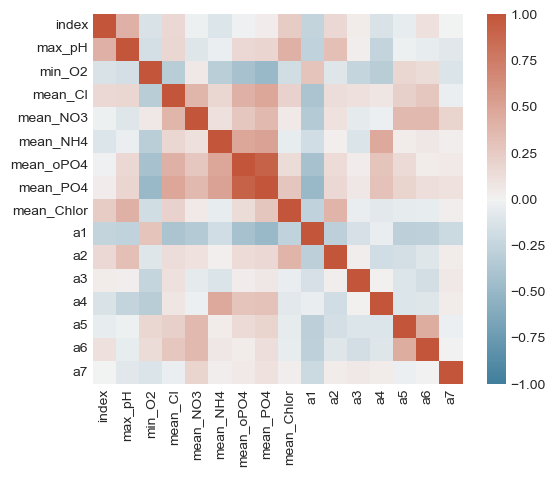

In [37]:
corr = df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin=-1, vmax=1, cmap=cmap);

In [38]:
best_predictors = {}
for target in targets.columns:
    best_predictors[target] = []
    three_best = corr[target].iloc[0:8].sort_values(ascending=False, key=lambda x: abs(x)).iloc[0:3]
    # add all predictors to the list as tuple (index, correlation)
    best_predictors[target] = list(three_best.items())
    
best_predictors
    

{'a1': [('mean_PO4', -0.4924154609423282),
  ('mean_oPO4', -0.41912479787803025),
  ('mean_Cl', -0.39788852361171273)],
 'a2': [('max_pH', 0.3234838110179044),
  ('index', 0.16385336572253634),
  ('mean_PO4', 0.16107977304202395)],
 'a3': [('min_O2', -0.24905077261836206),
  ('mean_NH4', -0.12335278969979853),
  ('mean_Cl', 0.113421614446822)],
 'a4': [('mean_NH4', 0.4651465844972848),
  ('min_O2', -0.3151451314338143),
  ('mean_PO4', 0.3050865937311096)],
 'a5': [('mean_NO3', 0.3637940090139412),
  ('mean_Cl', 0.21752130987438634),
  ('mean_PO4', 0.19255266387958575)],
 'a6': [('mean_NO3', 0.365099699061039),
  ('mean_Cl', 0.2668448392418629),
  ('min_O2', 0.13803142592767825)],
 'a7': [('mean_NO3', 0.18829421168746144),
  ('min_O2', -0.1188822485921676),
  ('mean_PO4', 0.10502048336394468)]}

The above code gives us the 3 best predictors for each target in terms of correlation (Pearson). 

However some predictors might be interralated which can lead to multicollinearity (so using all the best predictors is not always a good idea, PCA can be useful to deal with that). We will check for this in pass 3 when looking at relationships between features. 

## 2.2 Categorical features

We will now look at our categorical features individually.

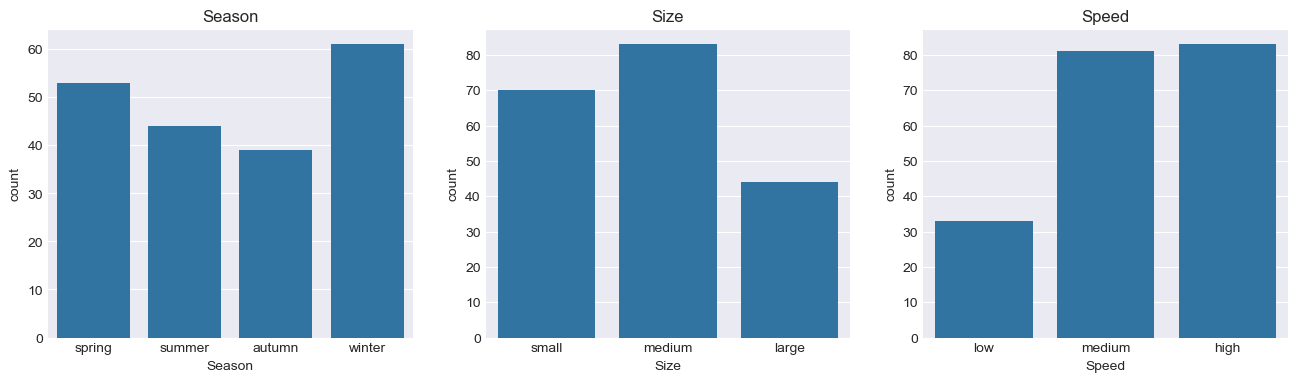

In [39]:
fig, axes = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(16, 4))
for column, ax in zip(categoricals.columns, axes):
    sns.countplot(x=column, data=categoricals, ax=ax)
    ax.set_title(column)

Our categories are reasonnably well balanced for our 3 categorical variables so no problem here.

I tried using a phik matrix to see relationships between out categorical variables and our targets but it did not work well. We well use interactive plots instead.

In [40]:
ddCat = widgets.Dropdown(options=categoricals.columns, value=categoricals.columns[0], description="Feature")
ddTarget = widgets.Dropdown(options=targets.columns, value=targets.columns[0], description="Target")
hBox = widgets.HBox([ddCat, ddTarget])

def plotCatTarget(cat, target):
    fig, axes = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(20, 6))
    # catplot point
    sns.pointplot(x=cat, y=target, data=df, ax=axes[0])
    # catplot strip
    sns.stripplot(x=cat, y=target, data=df, ax=axes[1])
    # boxplot
    sns.boxplot(x=cat, y=target, data=df, ax=axes[2])
    
out = widgets.interactive_output(plotCatTarget, {"cat":ddCat, "target":ddTarget})
display(hBox, out)

Output()

Using the interactive chart above, we can plot each categorical variable against each target variable. 

**Season :** `Season` seems to have no predictive power for `a1`, `a2`, `a4`, and `a7`. In fact the only differences between categories that appear on the first plot are due to a small number of outliers (we can see this on the strip and box plots). `Season` could potentially help in predicting `a3`, `a5`, and `a6`.

**Size :** `Size` seems to be a relatively good predictor for all targets. However, it has to be used in conjunction with other features as the often, 2 of the 3 categories are not very well separated and some outliers explain a lot of the variance.

**Speed :** `Speed` could potentially be used to predict `a1`, `a2`, and `a5`. 

## 2.3 Target variables

We can now calculate basic statistics and look at the distribution of our target variables.

In [41]:
targets.describe()
# nothing crazy for the targets so we can inded divide by 10

,a1,a2,a3,a4,a5,a6,a7
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,17.071574,7.508629,4.356345,2.001523,5.111675,5.641117,2.500000
std,21.450137,11.080746,6.987673,4.450149,7.530775,10.562346,5.191683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,3.100000,1.600000,0.000000,1.900000,0.000000,1.000000
75%,24.800000,11.300000,5.000000,2.400000,7.500000,6.900000,2.400000
max,89.800000,72.600000,42.800000,44.600000,44.400000,64.600000,31.600000


In [42]:
ddTarget2 = widgets.Dropdown(options=targets.columns, value=targets.columns[0], description="Target")
def showTargetDistributions(target):
    fig, axes = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(20, 4))
    # plot boxplot
    sns.boxplot(x=target, data=targets, ax=axes[0])
    # plot histogram
    sns.histplot(x=target, data=targets, kde=True, ax=axes[1])
    axes[1].axvline(targets[target].median(), color='r', linestyle='--', label='median')
    axes[1].axvline(targets[target].mean(), color='g', linestyle='-', label='mean')
    axes[1].legend()
    # plot qqplot
    pg.qqplot(targets[target], dist='norm', ax=axes[2])

out = widgets.interactive_output(showTargetDistributions, {"target":ddTarget2})
display(ddTarget2, out)

Dropdown(description='Target', options=('a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7'), value='a1')

Output()

We can see that all targets are heavily right skewed and have a lot of outliers for most of them. Transforming them might be a good idea, but to be honest I do not really know when and how to do it.

In [43]:
targets.eq(0.0).sum()

a1     36
a2     71
a3     72
a4    109
a5     77
a6    106
a7     97
dtype: int64

Something interesting to note is that our targets have a lot of `0.0` values (see counts above). Without more knowledge about the dataset we could think that corresponds to a missing measurement of the frequency of the algae in the river. It would then make sense to ignore these rows for plotting the distributions of the targets.

However, we have learned that these `0.0` values correspond in reality to very low measurements. Hence, it makes sense to include them in the distribution as it shows a more realistic distribution. 

> Maybe adding a categorical column for each target (`VERY_LOW` or `NOT_VERY_LOW`) could be a good idea to help prediction. For exemple, we could use a first model that would only predict the label of our new column and then we could use a second model to predict a value if the label predicted is `NOT_VERY_LOW`. This is just hypothetical, I do not know if it would work and maybe more data would be necessary if we need to train submodels with fractions of the entire dataset.

# Task 3: Third pass - relationships between features and target

## 3.1 Numerical features

In [44]:
num_corr = numericals.corr()
num_corr

,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor
max_pH,1.000000,-0.162155,0.168913,-0.101954,-0.036306,0.157387,0.181019,0.409374
min_O2,-0.162155,1.000000,-0.316966,0.057668,-0.304818,-0.416139,-0.486781,-0.180400
mean_Cl,0.168913,-0.316966,1.000000,0.383982,0.168301,0.416428,0.481257,0.199286
mean_NO3,-0.101954,0.057668,0.383982,1.000000,0.111276,0.272837,0.363189,0.050680
mean_NH4,-0.036306,-0.304818,0.168301,0.111276,1.000000,0.480582,0.502878,-0.053152
mean_oPO4,0.157387,-0.416139,0.416428,0.272837,0.480582,1.000000,0.915020,0.134056
mean_PO4,0.181019,-0.486781,0.481257,0.363189,0.502878,0.915020,1.000000,0.279874
mean_Chlor,0.409374,-0.180400,0.199286,0.050680,-0.053152,0.134056,0.279874,1.000000


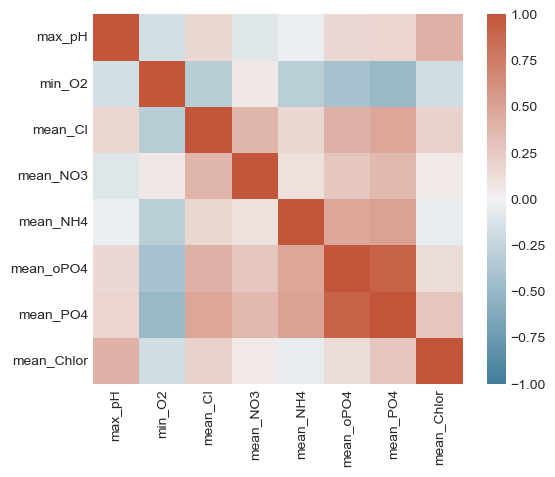

In [45]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(num_corr, square=True, vmin=-1, vmax=1, cmap=cmap);

In [46]:
highest_corrs = {}
for numcol in numericals.columns:
    highest_corrs[numcol] = []
    three_best = num_corr[numcol].sort_values(ascending=False, key=lambda x: abs(x)).iloc[1:4] # exclude itself first one corr = 1
    # add all predictors to the list as tuple (index, correlation)
    highest_corrs[numcol] = list(three_best.items())
    
highest_corrs

{'max_pH': [('mean_Chlor', 0.40937362766404056),
  ('mean_PO4', 0.18101938978259557),
  ('mean_Cl', 0.168912671027407)],
 'min_O2': [('mean_PO4', -0.48678097934792286),
  ('mean_oPO4', -0.416139232133481),
  ('mean_Cl', -0.31696558171511824)],
 'mean_Cl': [('mean_PO4', 0.48125697397832395),
  ('mean_oPO4', 0.4164275719275425),
  ('mean_NO3', 0.3839819674630803)],
 'mean_NO3': [('mean_Cl', 0.3839819674630803),
  ('mean_PO4', 0.36318928434132),
  ('mean_oPO4', 0.27283737962038335)],
 'mean_NH4': [('mean_PO4', 0.502878111251173),
  ('mean_oPO4', 0.48058186715053075),
  ('min_O2', -0.3048178367827922)],
 'mean_oPO4': [('mean_PO4', 0.9150196835471702),
  ('mean_NH4', 0.48058186715053075),
  ('mean_Cl', 0.4164275719275425)],
 'mean_PO4': [('mean_oPO4', 0.9150196835471702),
  ('mean_NH4', 0.502878111251173),
  ('min_O2', -0.48678097934792286)],
 'mean_Chlor': [('max_pH', 0.40937362766404056),
  ('mean_PO4', 0.2798744359963078),
  ('mean_Cl', 0.19928630246622384)]}

The above code gives us the 3 highest correlations for each numerical features. We can also look at the correlation matrix and heatmap to identify those.

We can notably see that `mean_PO4` and `mean_oPO4` are the most correlated variables (0.915). Those two features are also quite correlated with `mean_NH4` (~0.5).

`mean_O2` is anticorrelated with `mean_PO4` (-0.48) and `mean_oPO4` (-0.41). 

We have approximately the same values with `mean_Cl` but on the positive side.

We have other correlations but we wont list them all. 

As we can see our features are quite correlated with each other, what we can try to do is to use PCA to reduce the number of features and avoid multicollinearity issues when modelling.

> I do not know if it is necessary to transform the features to a normal distribution for PCA, but I will try without it. 

Before doing PCA, we need to scale our features. We will use the `StandardScaler` from `sklearn` to do so.

In [47]:
# scale features with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numericals_scaled = scaler.fit_transform(numericals)
numericals_scaled = pd.DataFrame(numericals_scaled, columns=numericals.columns)

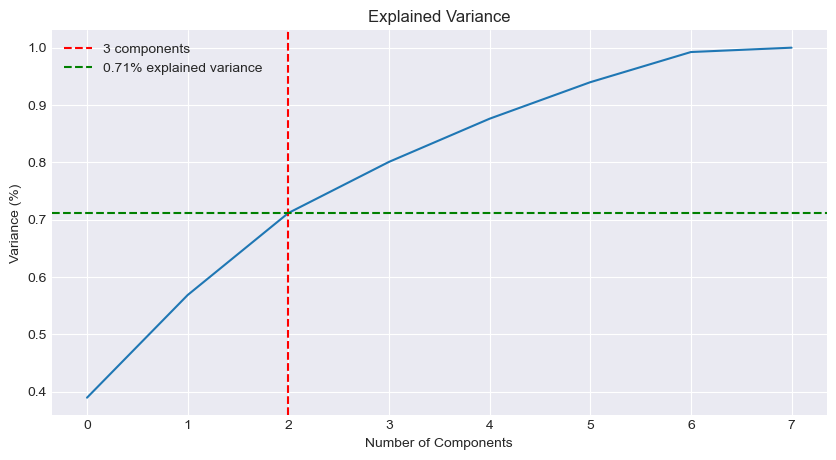

In [48]:
# apply PCA to numericals_scaled
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(numericals_scaled)

plt.figure(figsize=(10, 5))
variance_curve_points = np.cumsum(pca.explained_variance_ratio_)
plt.plot(variance_curve_points)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
# add vertical line at x = 2
plt.axvline(x=2, color='r', linestyle='--', label='3 components')
# add horizontal line at intersection for % variance at x = 2
plt.axhline(y=variance_curve_points[2], color='g', linestyle='--', label=f'{variance_curve_points[2]:.2f}% explained variance')

plt.legend()
plt.show()

Based on the explained variance curve, I decided to keep 3 components as we can see a small elbow at this point (small I admit but after we do not have any elbow until the 7th component which would not greatly simplify the model).

> Keeping only 3 components is also nice to simplify our analysis and visualisations, but maybe losing 30% of the explained variance is not a good idea in a real-word setting.

In [49]:
# keep first 3 components of PCA
pca = PCA(n_components=3)
# fit and transform
numericals_pca = pca.fit_transform(numericals_scaled)
# convert to dataframe
numericals_pca = pd.DataFrame(numericals_pca, columns=['PC1', 'PC2', 'PC3'])
numericals_pca.shape

(197, 3)

In [50]:
loadings = pd.DataFrame(pca.components_, columns=numericals.columns)
print(loadings)

     max_pH    min_O2   mean_Cl  mean_NO3  mean_NH4  mean_oPO4  mean_PO4  \
0  0.159078 -0.343778  0.367600  0.226414  0.322021   0.496160  0.531706   
1  0.644091 -0.122083  0.029840 -0.293479 -0.326257  -0.127104 -0.068480   
2  0.017163 -0.418993 -0.372813 -0.698156  0.387634   0.096917  0.024354   

   mean_Chlor  
0    0.193740  
1    0.596602  
2   -0.193632  


In [51]:
numericals_pca.corr()

,PC1,PC2,PC3
PC1,1.000000e+00,-7.813598e-17,1.945019e-16
PC2,-7.813598e-17,1.000000e+00,-3.082662e-17
PC3,1.945019e-16,-3.082662e-17,1.000000e+00


Obviously, once our points are projected onto our principal components, those components are not correlated at all, which removes the risk of multicollinearity.

In [52]:
# corr between PCs and numericals
PC_features_corrs = pd.concat([numericals_pca, numericals_scaled], axis=1).corr().iloc[0:3, 3:]

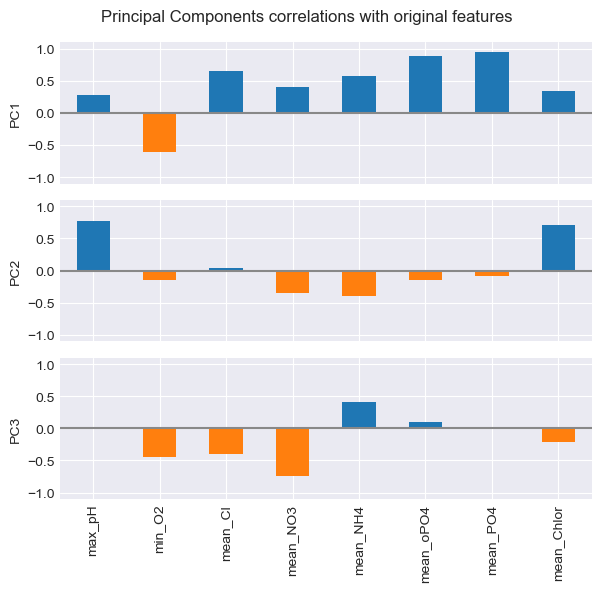

In [53]:
f, axes = plt.subplots(3, 1, figsize=(6, 6), sharex=True)

plt.suptitle('Principal Components correlations with original features')

for i, ax in enumerate(axes):
    pc_corrs = PC_features_corrs.iloc[i, :]
    colors = ['C0' if l > 0 else 'C1' for l in pc_corrs]
    ax.axhline(color='#888888')
    pc_corrs.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
    ax.set_ylim(-1.1, 1.1)

plt.tight_layout()
plt.show()

The first component contrasts the level of `min_O2` with the levels of all the other chemicals (but especially PO4s, Cl and NH4). Put differently, rivers with a high value on PC1 have a low level of `min_O2` (because PC1 is anticorrelated with `min_O2`) and high levels of PO4s, Cl and NH4 (and other variables as well).

The second component highlights observations with a high max_pH and a high `mean_Chlor`, with in contrast relatively low levels of `mean_NH4` and `mean_NO3`.

Finally, high PC3 values are associated with relatively high values of `mean_NH4`, low values of `mean_NO3` and relatively low values of `min_O2`, `mean_Cl` and `mean_Chlor`.

To illustrate some of the points mentioned above we can plot of our PCs against `mean_PO4`, `max_pH`, and `mean_NO3` respectively.

In [54]:
pair_plot_data = pd.concat([numericals_pca, numericals_scaled.loc[:,['mean_PO4', 'max_pH', 'mean_NO3']]], axis=1)
pair_plot_data.head()

,PC1,PC2,PC3,mean_PO4,max_pH,mean_NO3
0,1.117677,0.519747,-1.531264,0.244237,-0.040294,1.403482
1,3.775649,-0.417528,1.167851,3.266336,0.556549,-0.787608
2,0.398546,-0.347295,-1.056657,0.376836,0.130232,1.001561
3,0.626411,0.149648,0.643938,0.000915,0.079074,-0.338767
4,0.566923,-0.892065,-2.437756,-0.318748,0.062022,3.252851


<AxesSubplot: xlabel='mean_NO3', ylabel='PC3'>

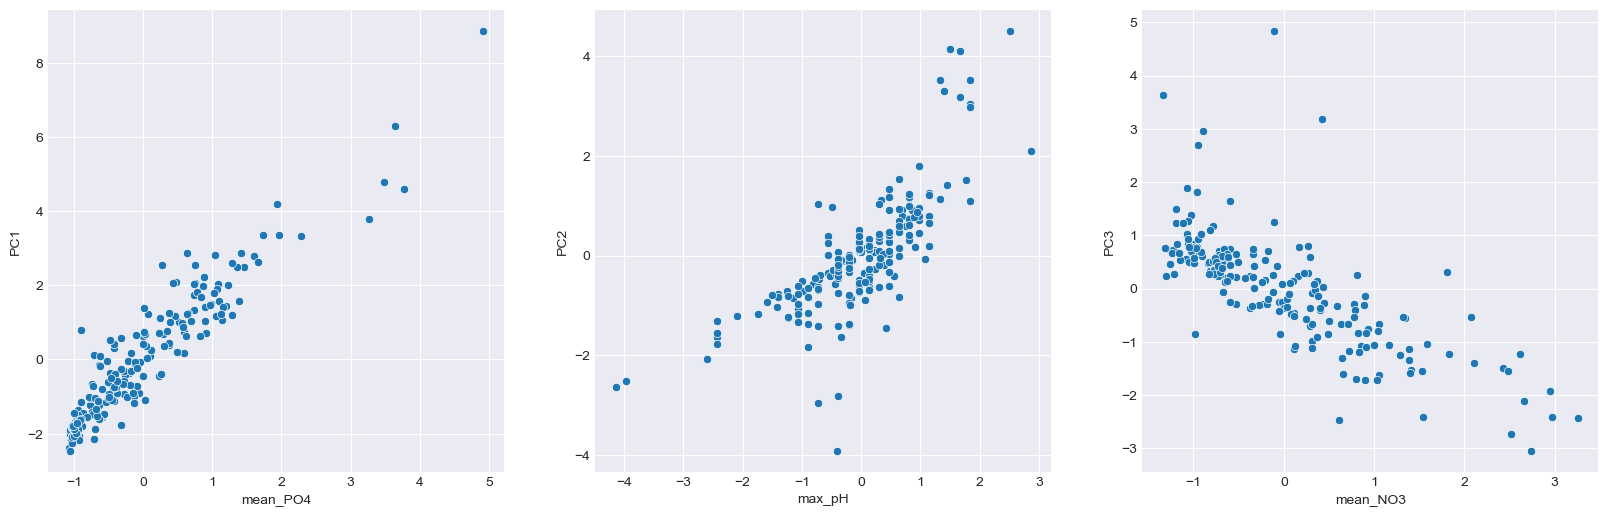

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.scatterplot(x='mean_PO4', y='PC1', data=pair_plot_data, ax=axes[0])
sns.scatterplot(x='max_pH', y='PC2', data=pair_plot_data, ax=axes[1])
sns.scatterplot(x='mean_NO3', y='PC3', data=pair_plot_data, ax=axes[2])

Before going to categorical features we can look if our PCs are correlated with our targets.

> I do not know if I am supposed to scale the targets first.

In [56]:
corrs_pcs_targets = pd.concat([numericals_pca, targets], axis=1).corr().iloc[0:3, 3:]
corrs_pcs_targets

,a1,a2,a3,a4,a5,a6,a7
PC1,-0.536052,0.225543,0.067202,0.302335,0.158771,0.126646,0.085171
PC2,-0.123167,0.326523,0.064102,-0.311353,-0.178586,-0.178535,-0.086803
PC3,0.179127,-0.116969,0.070564,0.326584,-0.336134,-0.346271,-0.056163


We can compare that with the original correlations between our features and our targets.

In [57]:
corr = df.corr()
corr.iloc[1:9, 9:]

/var/folders/dt/58d383mx6m5glpsgpmmsbj_80000gn/T/ipykernel_48282/568309710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,a1,a2,a3,a4,a5,a6,a7
max_pH,-0.274230,0.323484,0.027242,-0.250711,-0.016155,-0.050841,-0.090491
min_O2,0.289112,-0.095923,-0.249051,-0.315145,0.170042,0.138031,-0.118882
mean_Cl,-0.397889,0.131047,0.113422,0.077598,0.217521,0.266845,-0.032298
mean_NO3,-0.337540,0.104317,-0.068028,-0.025913,0.363794,0.365100,0.188294
mean_NH4,-0.175862,0.022718,-0.123353,0.465147,0.040952,0.067494,0.024663
mean_oPO4,-0.419125,0.146782,0.032641,0.295552,0.151693,0.043239,0.047744
mean_PO4,-0.492415,0.161080,0.064784,0.305087,0.192553,0.121516,0.105020
mean_Chlor,-0.279980,0.393090,-0.043989,-0.082670,-0.061115,-0.048686,0.029195


By comparing our PCs-targets correlations our features-targets we can see that we have lost some information but our PCs will be useful to simplify the final model and to analyse the relationships between numerical and categorical features. The lower correlations are also due to the removal of redundant information (multicollinearity).

## 3.2 Categorical features

To see the relationships between our categorical variables we will look at the phik correlation matrix, and use an interactive graph to plot each categorical variable against each other.

In [58]:
import phik
cat_corrs = categoricals.phik_matrix()
cat_corrs

,Season,Size,Speed
Season,1.0,0.000000,0.000000
Size,0.0,1.000000,0.621478
Speed,0.0,0.621478,1.000000


Using the phik correlation matrix, only `Speed` and `Size` seem to be correlated. We will verify this using an interactive chart.

This makes sense as the size of a river obviously does not depend on the season. (if there was a correlation, it would only mean that each river has not been measured in all seasons which is the case, and that additionnally scientist had a tendency to sample big rivers in the summer and small rivers in the winter for example).

The season has no impact on the speed as well which makes sense.

However the size of the river is obvisouly correlated with its speed as small rivers tend to be of higher speed.

In [59]:
ddCatFeature = widgets.Dropdown(options=categoricals.columns, value=categoricals.columns[0], description="Feature 1")
ddCatFeature2 = widgets.Dropdown(options=categoricals.columns, value=categoricals.columns[1], description="Feature 2")
hboxcat = widgets.HBox([ddCatFeature, ddCatFeature2])

def plotCatCat(cat1, cat2):
    sns.countplot(x=cat1, hue=cat2, data=categoricals)
    plt.show()

out = widgets.interactive_output(plotCatCat, {"cat1":ddCatFeature, "cat2":ddCatFeature2})
display(hboxcat, out)

Output()

We have already looked at the relationship between our categorical variables and our targets in pass 2.

## 3.3 Numerical features x Categorical features 

As our principal components are a simplified representation of our numerical features, we will use them to plot the relationships between our numerical and categorical features. We will also look directly at the relationships between our numerical features and our categorical features.

In [60]:
ddCatChoice = widgets.Dropdown(options=categoricals.columns, value=categoricals.columns[0], description="Categorical Feature")
ddFeatureOrPC = widgets.Dropdown(options=pd.concat([numericals, numericals_pca], axis=1).columns, value=pd.concat([numericals, numericals_pca], axis=1).columns[0], description="Numerical Feature")
hBox = widgets.HBox([ddCatChoice, ddFeatureOrPC])

def plotCatNum(cat, num):
    dfcombine = pd.concat([numericals, numericals_pca, categoricals], axis=1)
    fig, axes = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(20, 6))
    # catplot point
    sns.pointplot(x=cat, y=num, data=dfcombine, ax=axes[0])
    # catplot strip
    sns.stripplot(x=cat, y=num, data=dfcombine, ax=axes[1])
    # boxplot
    sns.boxplot(x=cat, y=num, data=dfcombine, ax=axes[2])
    
out = widgets.interactive_output(plotCatNum, {"cat":ddCatChoice, "num":ddFeatureOrPC})
display(hBox, out)

Output()

In [61]:
pd.concat([numericals, categoricals], axis=1).phik_matrix().iloc[8:, 0:8]

interval columns not set, guessing: ['max_pH', 'min_O2', 'mean_Cl', 'mean_NO3', 'mean_NH4', 'mean_oPO4', 'mean_PO4', 'mean_Chlor']


,max_pH,min_O2,mean_Cl,mean_NO3,mean_NH4,mean_oPO4,mean_PO4,mean_Chlor
Season,0.000000,0.338441,0.000000,0.000000,0.000000,0.000000,0.093199,0.072842
Size,0.654616,0.272472,0.290764,0.289923,0.000000,0.041206,0.545099,0.229893
Speed,0.439669,0.436318,0.542476,0.449638,0.134068,0.479438,0.594480,0.498355


In [62]:
pd.concat([numericals_pca, categoricals], axis=1).phik_matrix().iloc[3:, 0:3]

interval columns not set, guessing: ['PC1', 'PC2', 'PC3']


,PC1,PC2,PC3
Season,0.146408,0.000000,0.139287
Size,0.533145,0.465119,0.000000
Speed,0.672633,0.451688,0.344960


Using the interactive visualisation above we can see that both our numerical features and our PCs are correlated with our categorical features. Obviously, not all of them are correlated with all of them but we can see that there are some relationships. 

There are too many to describe them one by one but we can see for example that `Speed` and `PC1` definitely have a relationship, as well as `Size` and `max_pH` which is even more obvious.

We can also try to plot our PCs in 3D with coloring based on categories to see if some groups appear.

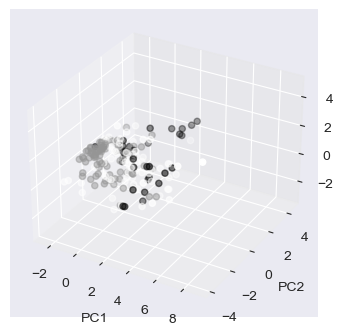

In [63]:
# 3D scatter plot of PC1 PC2 PC3 with hue season
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(numericals_pca['PC1'], numericals_pca['PC2'], numericals_pca['PC3'], c=pd.factorize(df['Speed'])[0])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()            

To see this plot interactively (move around, zoom in, etc.) you can run the algae3Dplot.py file in the same folder as this notebook. The categorical variable (hue) can be changed in the code.

In [64]:
cat_pcs = pd.concat([categoricals, numericals_pca], axis=1)
#save cat_pcs to pickle file
cat_pcs.to_pickle('data/04-Algae_Blooms/src/cat_pcs.pkl')

In 3D, it seems like some groups (categories) kind of appear but it is difficult to discern well them. We can try with 2D plots.

<AxesSubplot: xlabel='PC2', ylabel='PC3'>

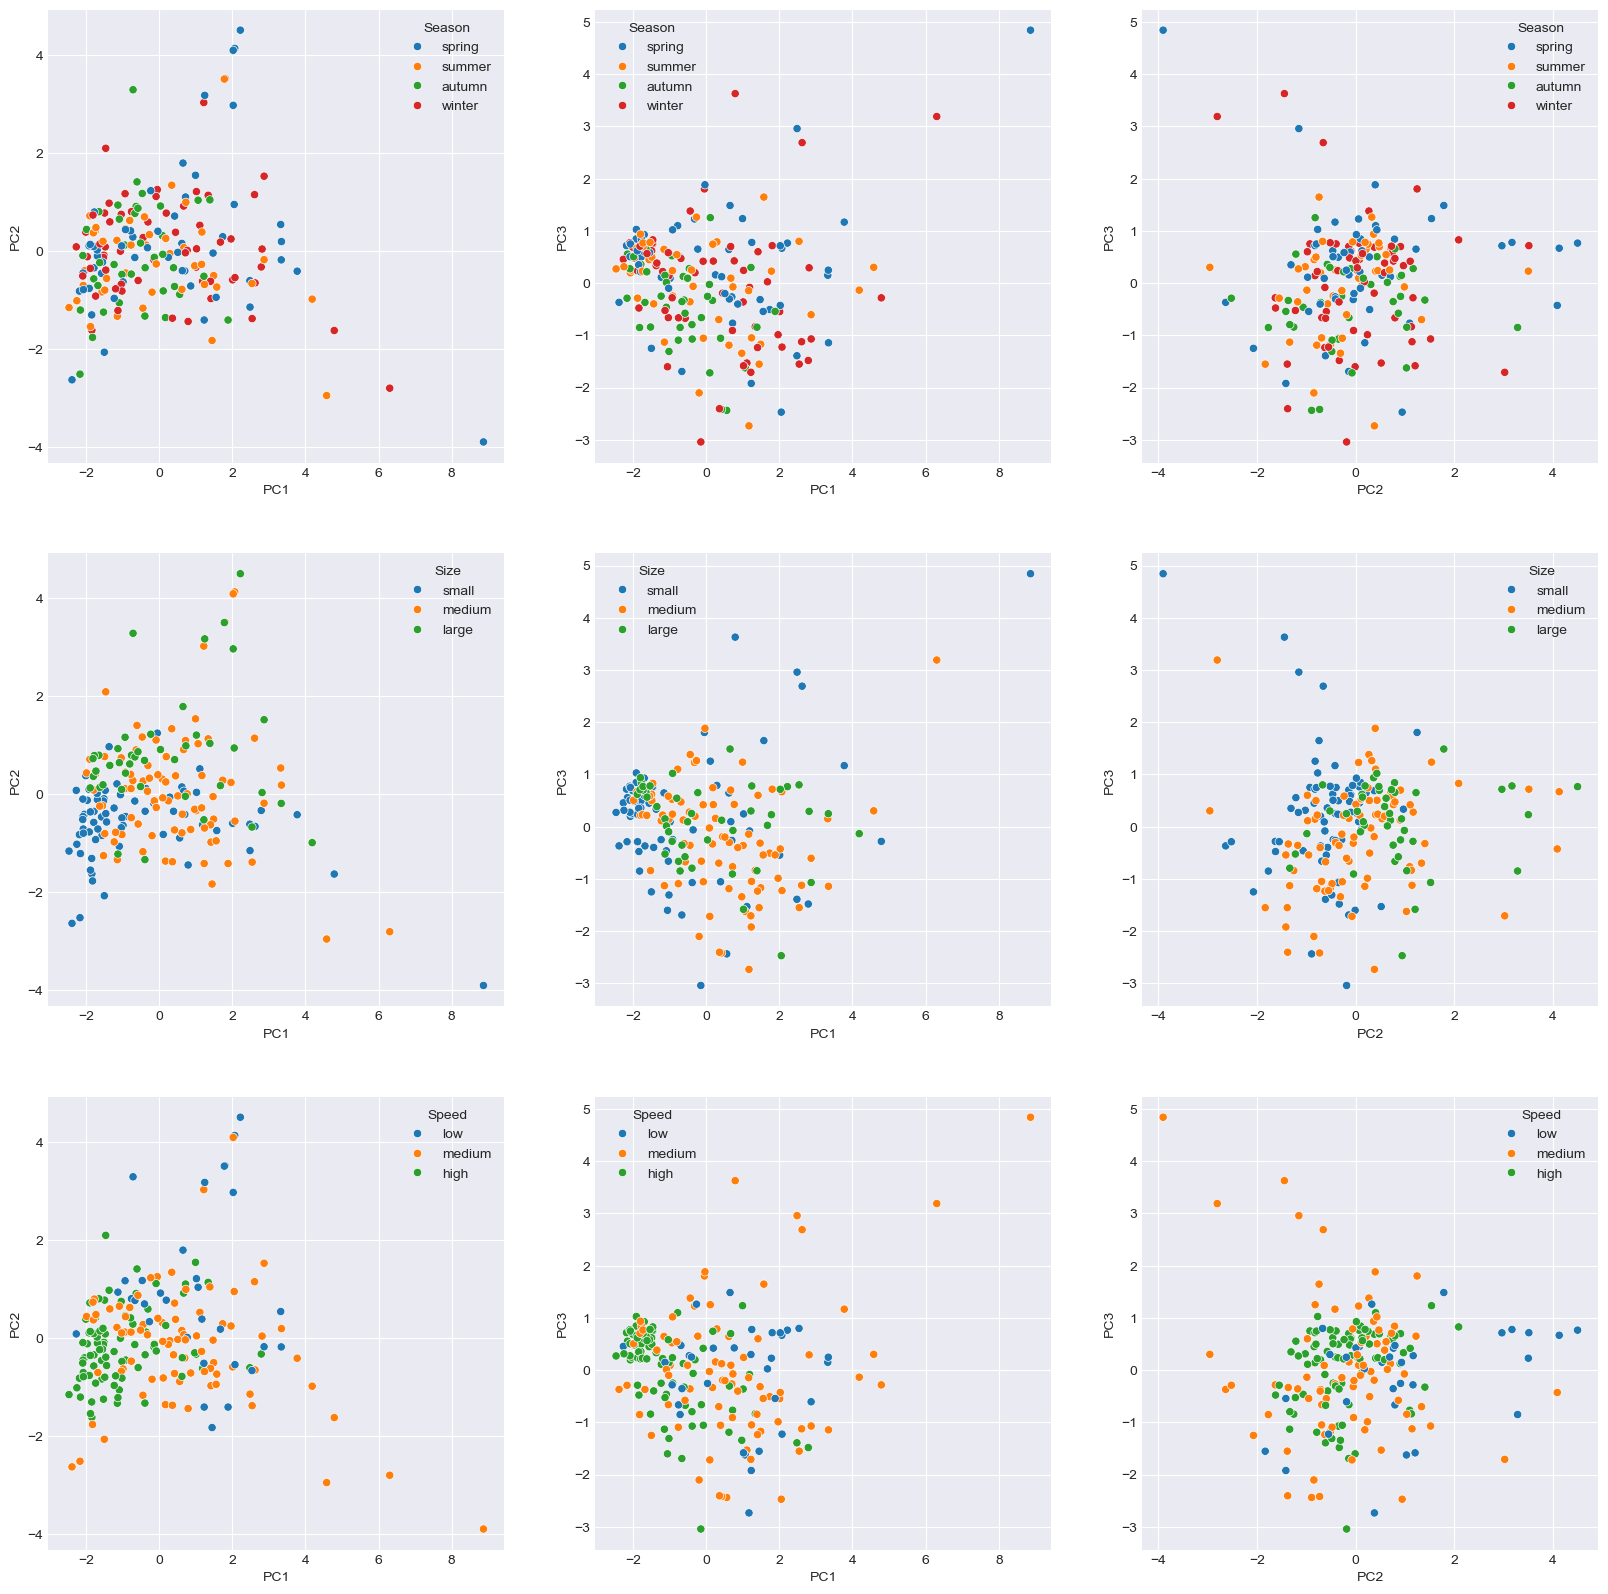

In [65]:
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
sns.scatterplot(x='PC1', y='PC2', hue='Season', data=cat_pcs, ax=axes[0, 0])
sns.scatterplot(x='PC1', y='PC3', hue='Season', data=cat_pcs, ax=axes[0, 1])
sns.scatterplot(x='PC2', y='PC3', hue='Season', data=cat_pcs, ax=axes[0, 2])
sns.scatterplot(x='PC1', y='PC2', hue='Size', data=cat_pcs, ax=axes[1, 0])
sns.scatterplot(x='PC1', y='PC3', hue='Size', data=cat_pcs, ax=axes[1, 1])
sns.scatterplot(x='PC2', y='PC3', hue='Size', data=cat_pcs, ax=axes[1, 2])
sns.scatterplot(x='PC1', y='PC2', hue='Speed', data=cat_pcs, ax=axes[2, 0])
sns.scatterplot(x='PC1', y='PC3', hue='Speed', data=cat_pcs, ax=axes[2, 1])
sns.scatterplot(x='PC2', y='PC3', hue='Speed', data=cat_pcs, ax=axes[2, 2])

In some of the graphs like the one in the bottom left corner, we can see some groups forming (here the high speed rivers seem to be concentrated).

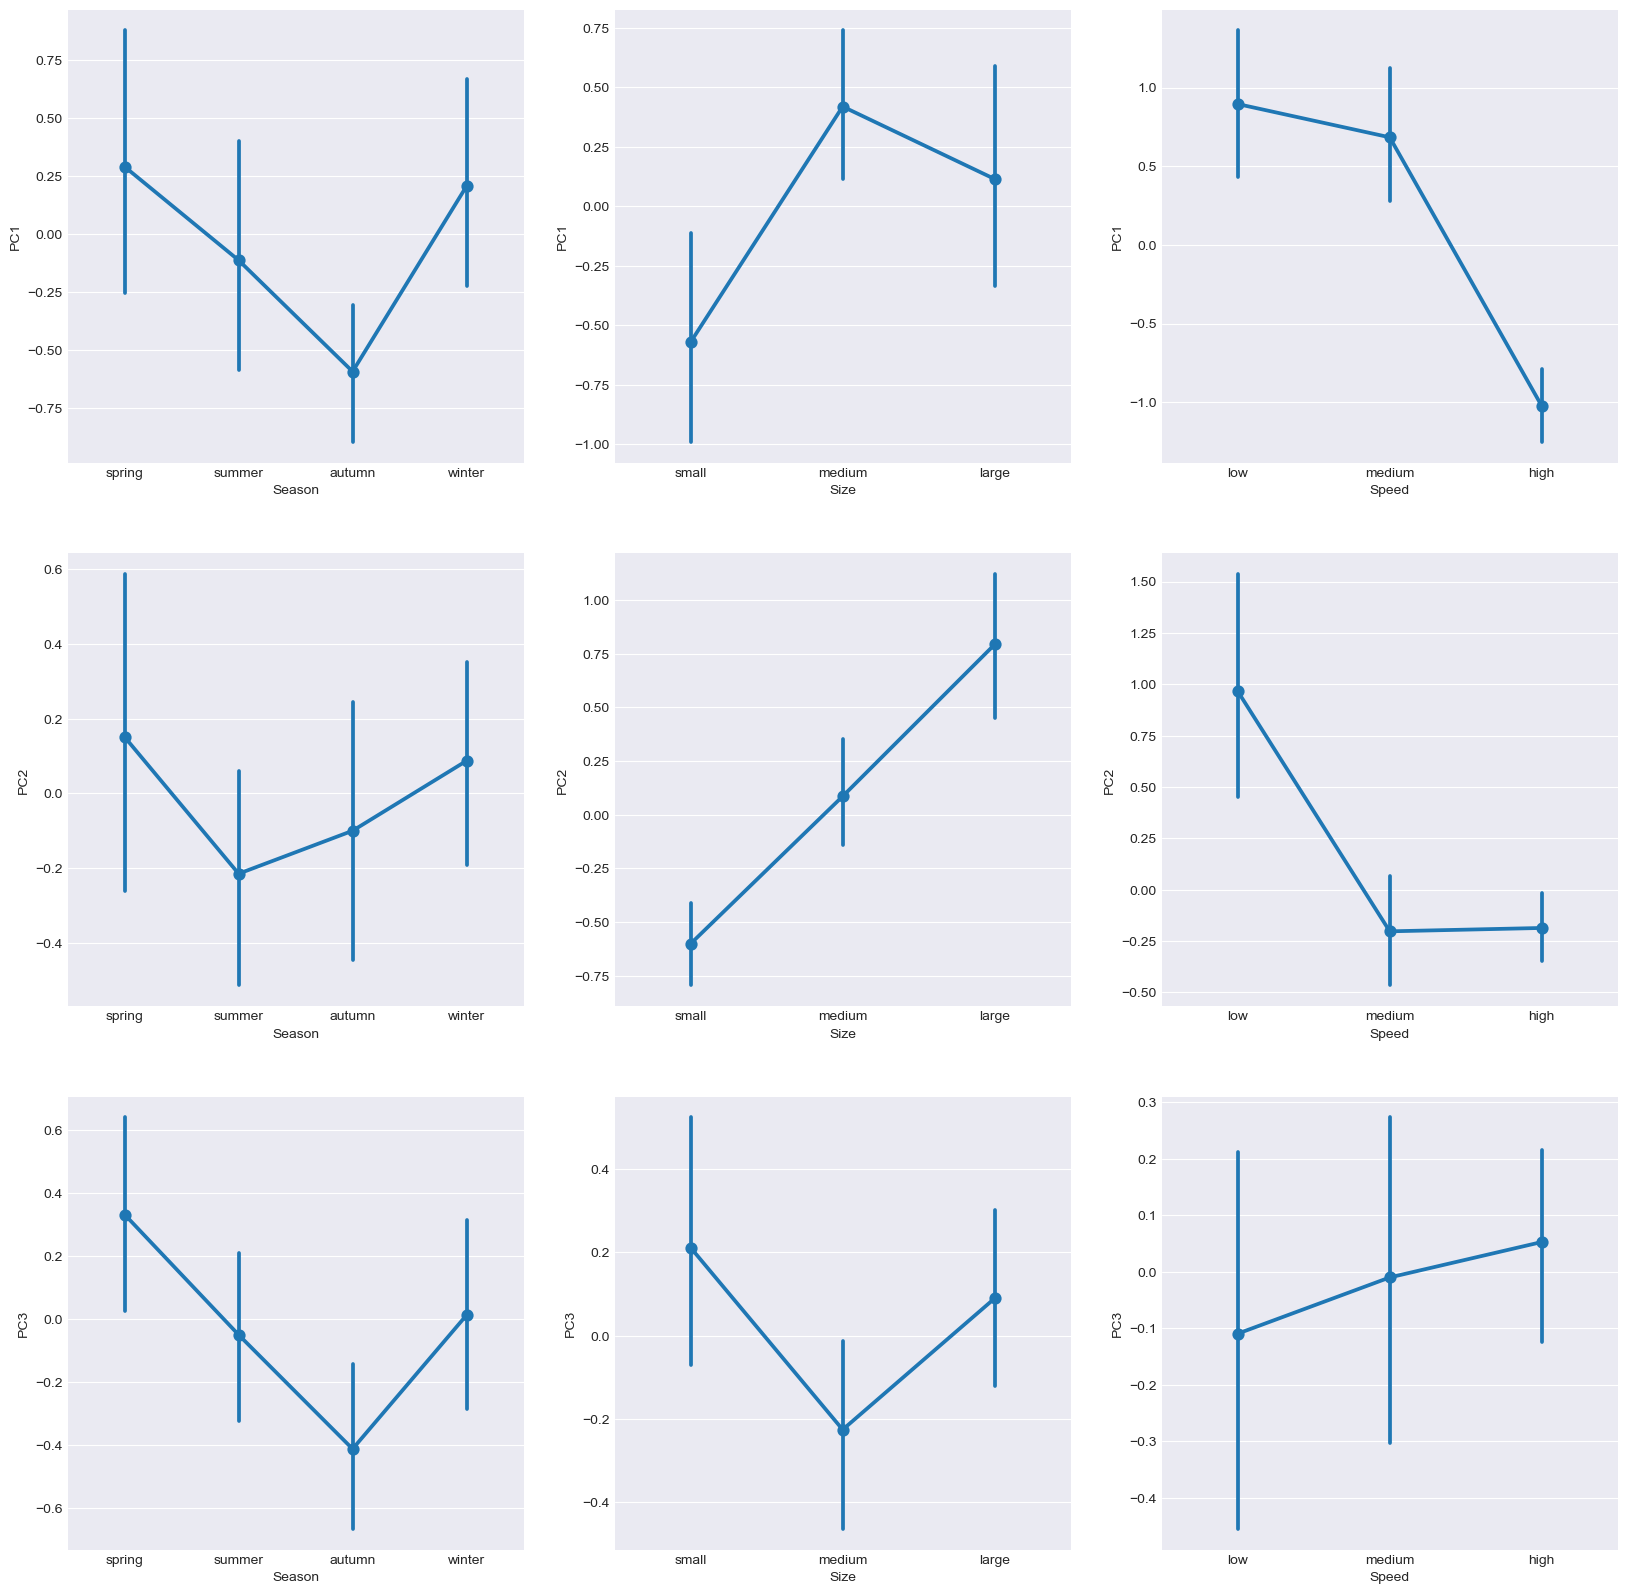

In [66]:
nb_num = len(numericals_pca.columns)
nb_cat = len(categoricals.columns)
fig, axes = plt.subplots(nb_num, nb_cat, sharex=False, sharey=False, figsize=(20, 20))
for i in range(nb_num):
    for j in range(nb_cat):
        sns.pointplot(y=numericals_pca.columns[i], x=categoricals.columns[j], data=cat_pcs, ax=axes[i,j])

However, using this type of graphs makes the relationships between our PCs and our categorical features appear more clearly. 

In conclusion (for the relationships between categorical and numerical features), we definitely have some relationships between our categorical and numerical features. If we want to build a model, we will have to take this into account. 